<a href="https://colab.research.google.com/github/chauhansrc/Instacart-Exploratory-Data-Analysis/blob/main/Instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets seaborn  --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 22.7 MB/s eta 0:00:00


In [2]:
import os 
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import gc

## Downloading and Reading the Dataset

In [4]:
od.download("https://www.kaggle.com/competitions/instacart-market-basket-analysis/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: shadeofshadow
Your Kaggle Key: ··········


100%|██████████| 196M/196M [00:02<00:00, 98.9MB/s]



Extracting archive ./instacart-market-basket-analysis/instacart-market-basket-analysis.zip to ./instacart-market-basket-analysis


In [5]:
dataset_files = os.listdir("./instacart-market-basket-analysis")


In [6]:
from zipfile import ZipFile
for zip_csv in dataset_files:
  if zip_csv[-4:] == '.zip':
    with ZipFile("./instacart-market-basket-analysis/" + zip_csv, 'r') as zObject:
        zObject.extractall("./instacart-market-basket-analysis")

In [7]:
os.listdir("./instacart-market-basket-analysis")

['sample_submission.csv',
 'order_products__train.csv.zip',
 '__MACOSX',
 'order_products__prior.csv.zip',
 'departments.csv.zip',
 'sample_submission.csv.zip',
 'departments.csv',
 'orders.csv.zip',
 'products.csv.zip',
 'order_products__prior.csv',
 'order_products__train.csv',
 'products.csv',
 'aisles.csv',
 'orders.csv',
 'aisles.csv.zip']

We have 7 csv files in the dataset.

In [8]:
aisles_df = pd.read_csv("./instacart-market-basket-analysis/aisles.csv")
departments_df = pd.read_csv("./instacart-market-basket-analysis/departments.csv")
orders_df = pd.read_csv("./instacart-market-basket-analysis/orders.csv")
order_prior_df = pd.read_csv("./instacart-market-basket-analysis/order_products__prior.csv")
order_train_orig_df = pd.read_csv("./instacart-market-basket-analysis/order_products__train.csv")
order_train_df  = order_train_orig_df[:10000]
products_df = pd.read_csv("./instacart-market-basket-analysis/products.csv")
submission_df = pd.read_csv("./instacart-market-basket-analysis/sample_submission.csv")


## Exploratory Data Analysis

In [9]:
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [10]:
aisles_df.isna().sum()

aisle_id    0
aisle       0
dtype: int64

**`aisles_df` :** contains information about products in each aisle.
* It has 134 rows of data each belonging to a different aisle.
* No null values.

In [11]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


**`departments_df` :** It has **21 rows of data** containing information about all the departments and **no null values**

In [12]:
orders_df.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [13]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [14]:
orders_df.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [15]:
pd.DataFrame(orders_df.eval_set.value_counts())

,eval_set
prior,3214874
train,131209
test,75000


In [16]:
# Checking the total amount of individual costumers present in the orders_df.
def get_unique_counts(x):
    return len(np.unique(x))

print(orders_df.groupby('eval_set')['user_id'].aggregate(get_unique_counts))

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64


There are 206209 unique values in the `orders_df` dataset and we need to predict value for the orders with `eval_set` labled `test`.

**`orders_df` :** Contains 3421083 rows and 7 columns:
   * `order_id` : Order id of the purchase.                
   * `user_id` : User id of the consumer.                 
   * `eval_set` : Which dataset that particular order belongs to. last purchase of every user is in **test** or **train** set and any previous order is in **prior** set.                 
   * `order_number` : contains the order number of the user, eg. 5 represents this is the 5th order of that user.             
   * `order_dow` : Day of the week of the order.               
   * `order_hour_of_day` : At what hour the order was made.       
   * `days_since_prior_order` : Number of days since the previous order was made. If no previous order is made, the value is null. 
   

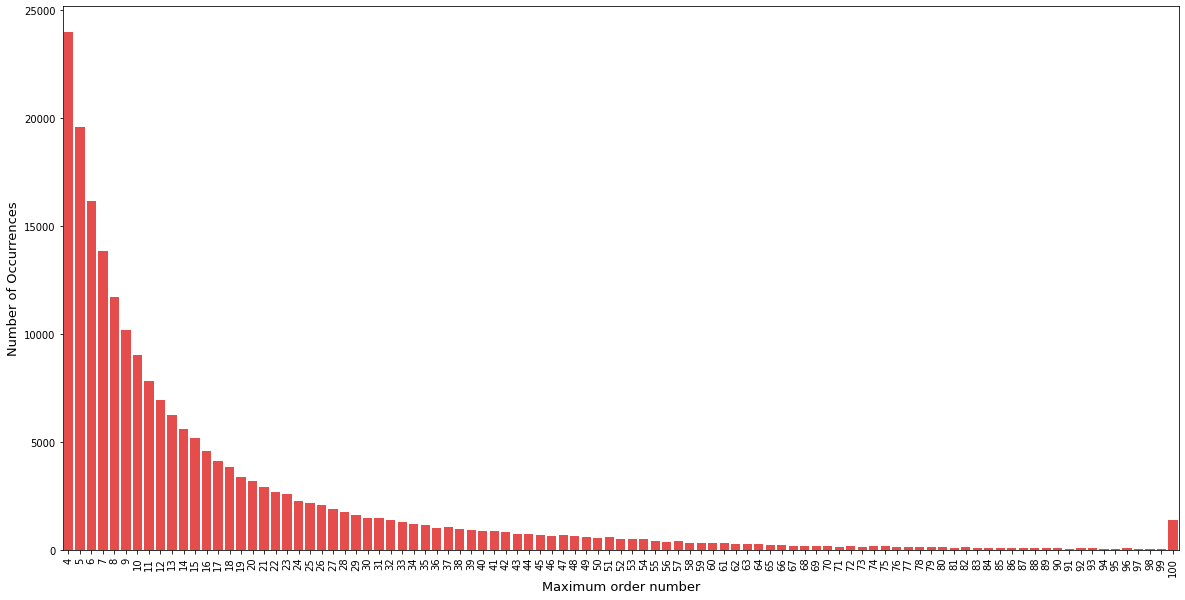

In [17]:
# Checking the occurrences of the maximum order numbers
order_num = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
order_num = order_num['order_number'].value_counts()

plt.figure(figsize=(20,10))
sns.barplot(x=order_num.index, y=order_num.values, alpha=0.8, color='red')
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Maximum order number', fontsize=13)
plt.xticks(rotation='vertical')
plt.show()

* The number of user orders range from 4 to 100. 
* 4 orders by a user has the maximum occurance in the data set.

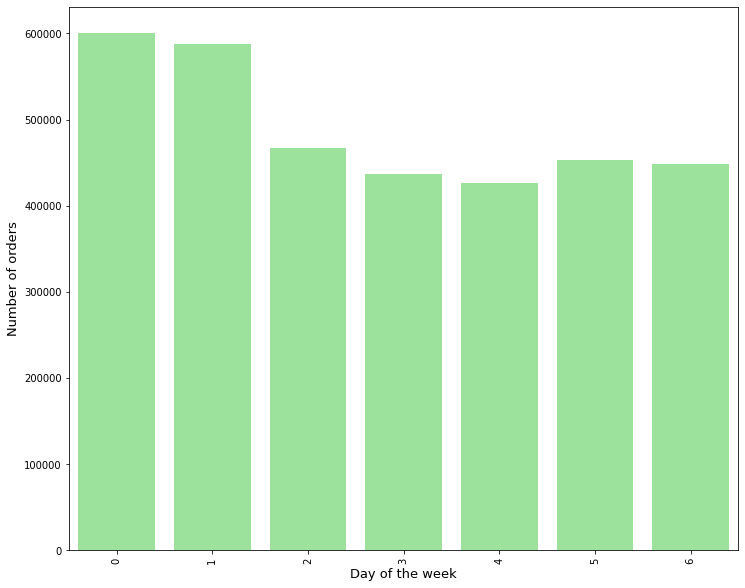

In [18]:
# Checking the orders by day of the week
orders_dow = orders_df['order_dow']

plt.figure(figsize=(12,10))
sns.countplot(x=orders_dow, data=orders_df, color='lightgreen')
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Day of the week', fontsize=13)
plt.xticks(rotation='vertical')
plt.show()

* There's no data on what day of the week do the numbers represent but since the orders are highest on 0 and 1 we can assume they are weekends.

* The number of orders on the working days are fairly uniform, though wednesday has the lowest number of orders.

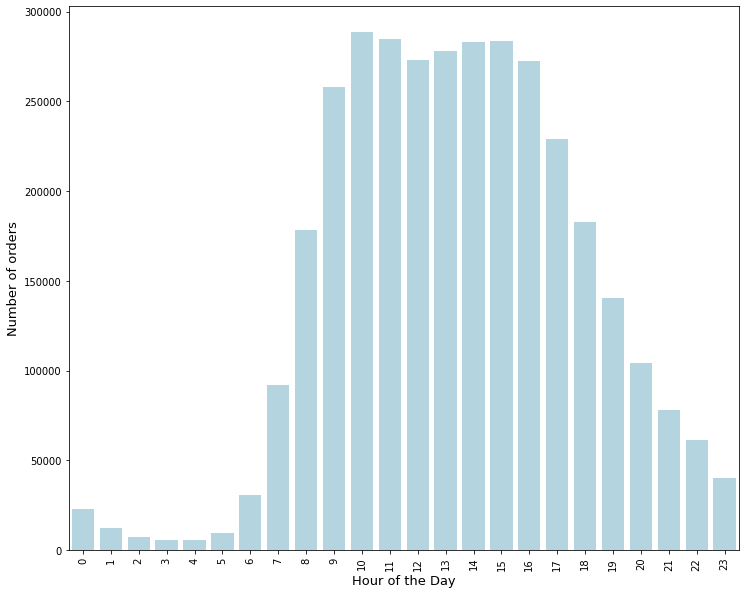

In [19]:
# Checking the orders by hour of the day
orders_dow = orders_df['order_hour_of_day']

plt.figure(figsize=(12,10))
sns.countplot(x=orders_dow, data=orders_df, color='lightblue')
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hour of the Day', fontsize=13)
plt.xticks(rotation='vertical')
plt.show()

* Orders are very low during **12 AM to 5 AM** but quickly start to **rise after 6 AM**.

* Most orders take place during 10 AM and least orders take place at 3 AM.

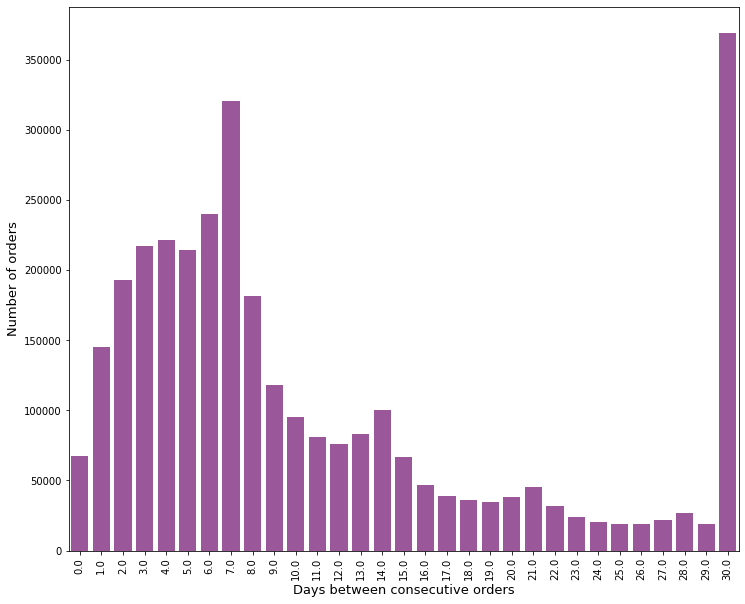

In [20]:
# Checking the number of days between consecutive orders of the user.
orders_dow = orders_df['days_since_prior_order']

plt.figure(figsize=(12,10))
sns.countplot(x=orders_dow, data=orders_df, alpha=0.7, color='purple')
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days between consecutive orders', fontsize=13)
plt.xticks(rotation='vertical')
plt.show()

* It seems like the maximum number of days between the orders is 30 days and minimum is 0 days, i.e orders on consecutive days.
* The maximum number of orders are placed with a **30 day difference**, which might indicate the monthly orders by the consumers. Consumers are probably buying the essential items on a monthly basis.
* Second highest number of orders are placed within **7 days difference**, which might indicate the weekly orders by the consumers.
* The least number of orders are placed with **25 and 26 days difference**.

In [21]:
order_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [22]:
order_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [23]:
order_prior_df.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

**`order_prior_df` :** It has **32434489 rows** and **4 columns** and **no null values**.

* `order_id` : order id of the purchase.
* `product_id` : product id of the product, it can be used to access which product was ordered from `products_df`.
* `add_to_cart_order` : order in which they were added to the cart.
* `reordered` : whether a product was reordered or not.


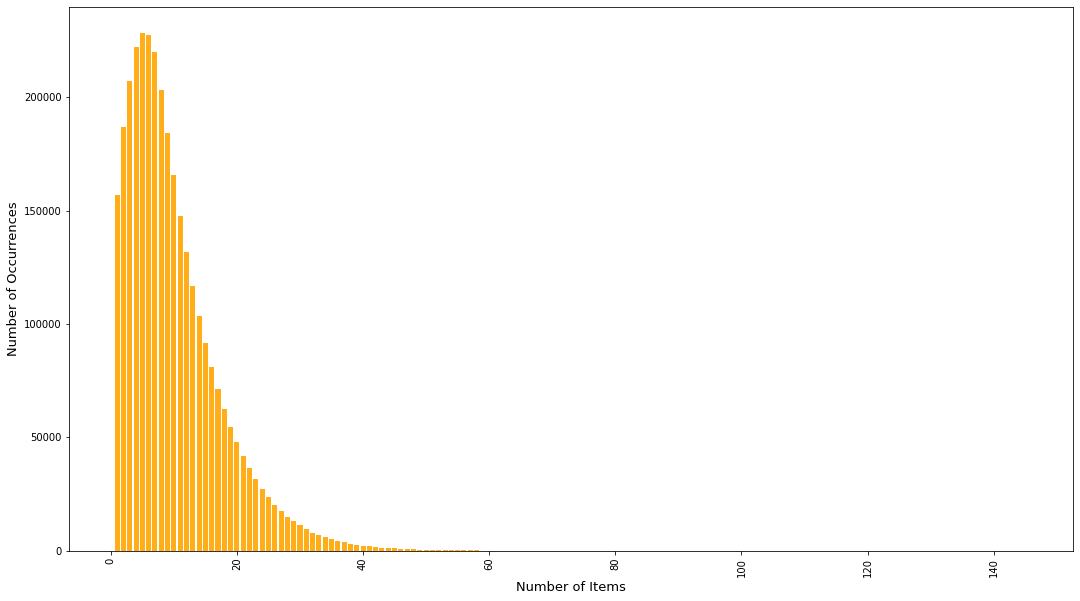

In [24]:
product_amount = order_prior_df.groupby('order_id')['add_to_cart_order'].aggregate(np.max).reset_index()
product_count = product_amount.add_to_cart_order.value_counts()

fig, ax = plt.subplots(figsize=(18,10))

ax.bar(x=product_count.index, height=product_count.values, alpha=0.9, color = 'orange')
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Number of Items', fontsize=13)
plt.xticks(rotation='vertical')
plt.show()

* Most common number of items in an order is **5 item**.

In [25]:
order_train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
9995,23978,4565,16,1
9996,23978,40287,17,0
9997,23978,1890,18,1
9998,23993,5450,1,1


In [26]:
order_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   order_id           10000 non-null  int64
 1   product_id         10000 non-null  int64
 2   add_to_cart_order  10000 non-null  int64
 3   reordered          10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


**`order_train_df` :** It has **1384617 rows** and **4 columns** and **no null values**.

* `order_id` : order id of the purchase.
* `product_id` : product id of the product, it can be used to access which product was ordered from `products_df`.
* `add_to_cart_order` : order in which they were added to the cart.
* `reordered` : whether a product was reordered or not.

In [27]:
product_amount = order_train_df.groupby('order_id')['add_to_cart_order'].aggregate(np.max).reset_index()
product_count = product_amount.add_to_cart_order.value_counts()

fig, ax = plt.subplots(figsize=(18,10))

ax.bar(x=product_count.index, height=product_count.values, alpha=0.9, color = 'red')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Items', fontsize=12)
plt.xticks(rotation='vertical')
ax.annotate('Most common amount of items per order: {:.0f}'.format(product_count.idxmax()), xy=(6, 8900), xytext=(11, 8300), fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

ValueError: ignored

<Figure size 1296x720 with 1 Axes>

* As we can see the most common number of items in an order is 5 in both the prior and train set.

In [28]:
bestsellers_train = order_train_df.groupby('product_id')['add_to_cart_order'].count().sort_values(ascending=False).reset_index()
# Merging dfs to get the product names for the best sellers
bestsellers_train = bestsellers_train.merge(products_df[['product_id','product_name']], on='product_id')
# Checking top 10
bestsellers_train.head(10)

,product_id,add_to_cart_order,product_name
0,24852,124,Banana
1,21137,98,Organic Strawberries
2,13176,94,Bag of Organic Bananas
3,21903,70,Organic Baby Spinach
4,47626,66,Large Lemon
5,47209,54,Organic Hass Avocado
6,47766,45,Organic Avocado
7,30391,44,Organic Cucumber
8,26209,43,Limes
9,16797,41,Strawberries
